In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


# def parser(x):
#     return datetime.strptime("190" + x, "%Y-%m")


# df = pd.read_csv("shampoo.csv",
#     header=0,
#     index_col=0,
#     parse_dates=True,
#     squeeze=True,
#     date_parser=parser,
# )

df = pd.read_csv("Shampoo_Sell.csv")
df.head()

,Month,Sale
0,2021-01,266.0
1,2021-02,145.9
2,2021-03,183.1
3,2021-04,119.3
4,2021-05,180.3


<Axes: >

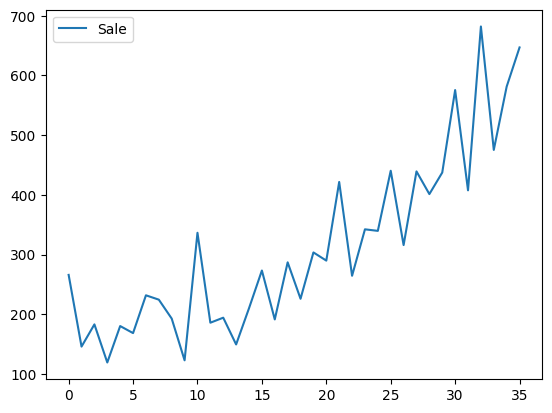

In [6]:
df.dropna()
df.plot()

<Axes: >

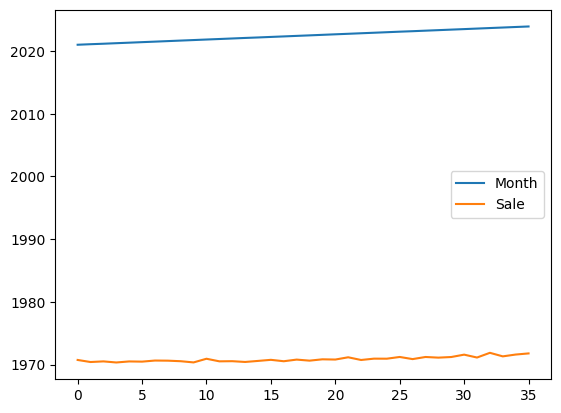

In [7]:
df["Month"] = pd.to_datetime(df["Month"])
df.plot()

In [8]:
df.head()

,Month,Sale
0,2021-01-01,266.0
1,2021-02-01,145.9
2,2021-03-01,183.1
3,2021-04-01,119.3
4,2021-05-01,180.3


In [9]:
df = df.set_index("Month")
df.head()


,Sale
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


<Axes: xlabel='Month'>

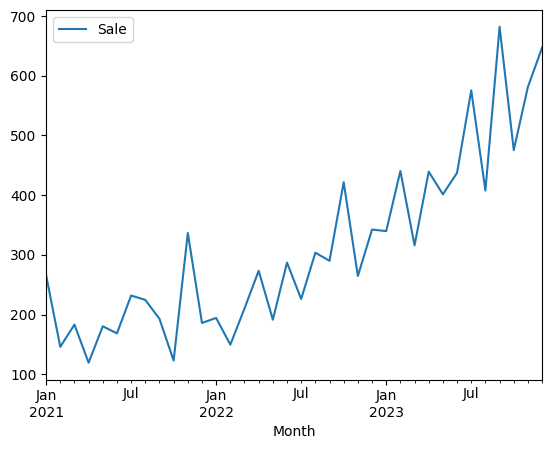

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

# test_result = adfuller(df["Sale"])
def adfulller_test(sale):
    result = adfuller(sale)
    if(result[1] < 0.05):
        print(f"p-value = {result[1]}, so the data is Stationary.")
    else:
        print(f"p-value = {result[1]}, so the data is Non-Stationary.")
adfulller_test(df["Sale"])

p-value = 1.0, so the data is Non-Stationary.


<Axes: xlabel='Month'>

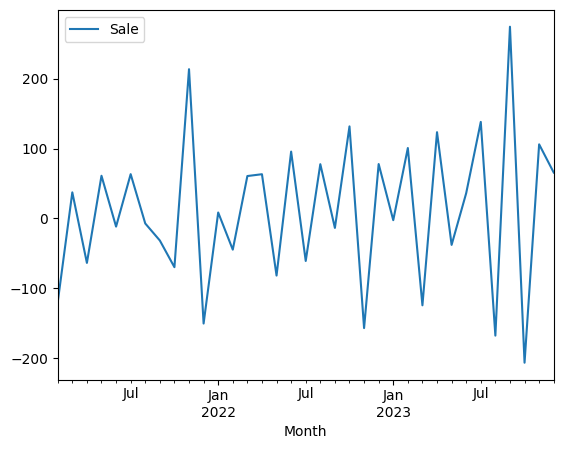

In [12]:
firstOrderDiff = df - df.shift(1) # shift moves the data down by 1
firstOrderDiff = firstOrderDiff.dropna()
firstOrderDiff.plot()

In [13]:
adfulller_test(firstOrderDiff["Sale"])
d = 1

p-value = 1.7998574141687034e-10, so the data is Stationary.


<Axes: xlabel='Month'>

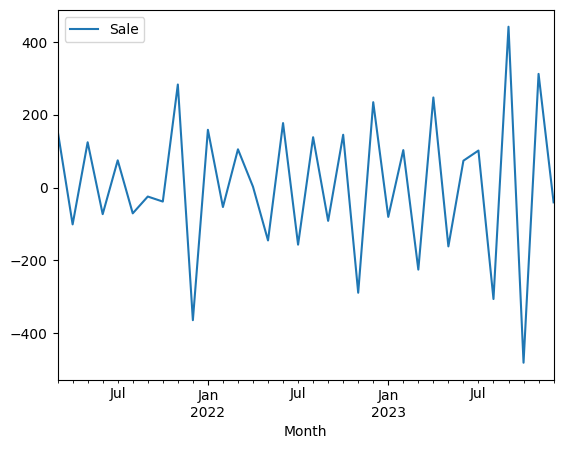

In [14]:
secondOrderDiff = firstOrderDiff - firstOrderDiff.shift(1)
secondOrderDiff = secondOrderDiff.dropna()
secondOrderDiff.plot()

In [15]:
adfulller_test(secondOrderDiff["Sale"])

p-value = 0.003906334939659212, so the data is Stationary.


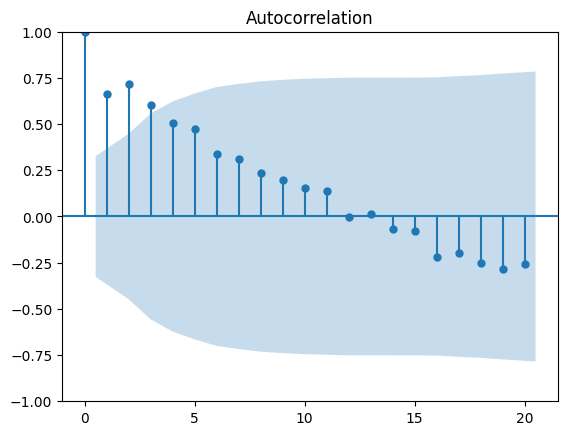

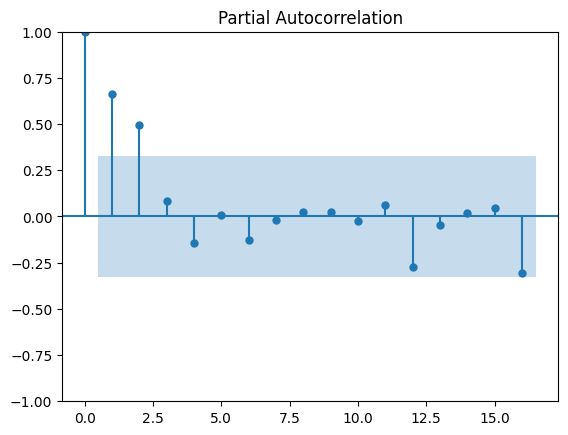

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
# plot_acf(df, lags=20, ax=ax1)
# plot_pacf(df, ax=ax2)

plot_acf(df, lags=20)
plot_pacf(df)
plt.show()

In [17]:
p = 2
q = 3

### Finding Optimal p, d, q

In [27]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

import itertools
p = d = q = range(0, 5)
pdq_combinations = list(itertools.product(p, d, q))

min_rmse = 10 ** 9
optimal_pdq = (0, 0, 0)

for pdq in pdq_combinations:
    try:
        model = ARIMA(train, order = pdq).fit()
        predict = model.forecast(len(test))
        error = np.sqrt(mean_squared_error(test, predict))
        if error < min_rmse:
            min_rmse = error
            optimal_pdq = pdq
    except:
        continue

print(optimal_pdq, min_rmse)

(2, 2, 4) 67.10831929155704


In [28]:
p, d, q = optimal_pdq
print(p, d, q)

2 2 4


In [29]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df) * 0.66)    # 66% of data is used for training
train = df[ : train_size]
test = df[train_size: ]

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   23
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -118.648
Date:                Thu, 25 Jan 2024   AIC                            251.296
Time:                        03:51:29   BIC                            258.607
Sample:                    01-01-2021   HQIC                           252.883
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9582      0.359     -5.457      0.000      -2.662      -1.255
ar.L2         -0.9888      0.380     -2.600      0.009      -1.734      -0.243
ma.L1          0.0460     32.084      0.001      0.9

In [30]:
prediction = model_fit.predict(start=len(train), end=len(df)-1)
print(prediction)


2022-12-01    362.627611
2023-01-01    316.197815
2023-02-01    395.795288
2023-03-01    366.526311
2023-04-01    425.823639
2023-05-01    419.338006
2023-06-01    454.093569
2023-07-01    473.137632
2023-08-01    482.167688
2023-09-01    526.343798
2023-10-01    511.597572
2023-11-01    577.481881
2023-12-01    543.736635
Freq: MS, Name: predicted_mean, dtype: float64


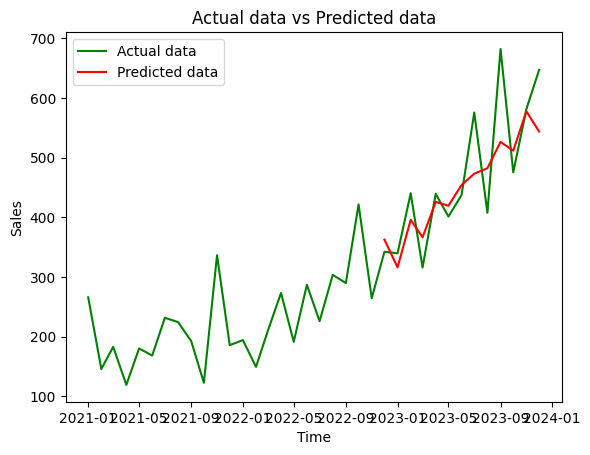

In [31]:
plt.plot(df, color='green', label= "Actual data")
plt.plot(prediction, color='red', label= "Predicted data")
plt.title("Actual data vs Predicted data")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [23]:
# import statsmodels.api as sm

# model = sm.tsa.statespace.SARIMAX(train, order=(p,d,q), seasonal_order=(p,d,q,24))
# model_fit = model.fit()
# # print(model_fit.summary())

# prediction = model_fit.predict(start=len(train), end=len(df)-1)
# print(prediction)

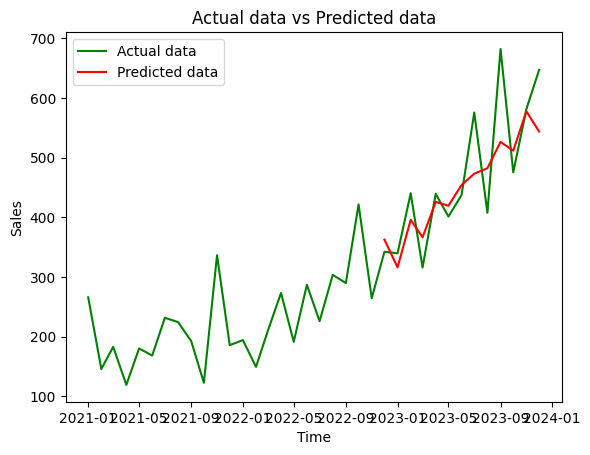

In [32]:
plt.plot(df, color='green', label= "Actual data")
plt.plot(prediction, color='red', label= "Predicted data")
plt.title("Actual data vs Predicted data")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

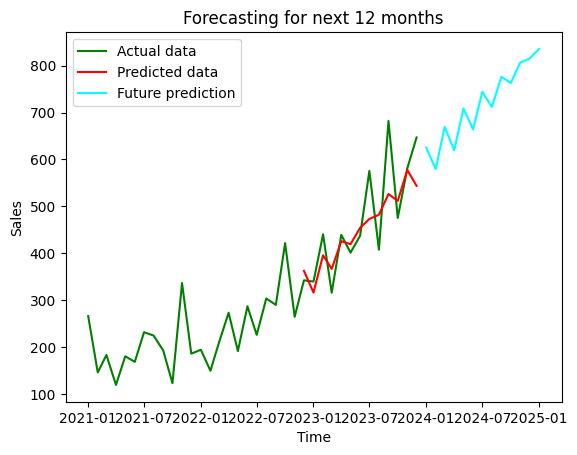

In [33]:
future_prediction = model_fit.predict(start=len(df),end=len(df)+12)
plt.plot(df, color='green', label= "Actual data")
plt.plot(prediction, color='red', label= "Predicted data")
plt.plot(future_prediction, color='cyan', label= "Future prediction")
plt.title("Forecasting for next 12 months")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, prediction)
rmse = (mse)**0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 4503.526518137566
Root Mean Squared Error: 67.10831929155704
